Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
import shutil

import random
import re
import glob
from PIL import Image,ImageDraw,ImageFont

import ENVCONFIG

/home/wjm41/ml_physics/GANji
WILL-CSD3


Load annotated font .csv and define root directory containing google fonts repo

In [2]:
df = pd.read_csv('google-fonts-annotation.csv')

# change your path here
rds_dir = ENVCONFIG.rds_dir
ROOT = rds_dir+'/fonts/ofl'

define font filtering & retrieval function

In [3]:
def filter_fonts_get_paths(df, root='./', variants=['_'], subsets=['_'], category=''):
    # exceptions
    if not variants or variants == [''] or variants == '': variants = ['_']
    if not subsets or subsets == [''] or subsets == '': subsets = ['_']
    # apply filters
    regex_filters = variants + subsets + ['_'+category]
    df_new = pd.concat([df.filter(regex=re.compile(regex, re.IGNORECASE), axis=1).sum(axis=1).astype(bool) for regex in regex_filters], axis=1)
    mask = df_new.all(axis=1)
    filtered_fontnames = list(df.loc[mask].family)
    # construct file paths
    paths = []
    for fontname in filtered_fontnames:
        if variants == ['_']: # select all variants
            sel = glob.glob(f'{root}/{fontname.lower()}/**/**/**/*.ttf', recursive=True)
            paths.extend(sel)
        else:
            for variant in variants:
                sel = glob.glob(f'{root}/{fontname.lower()}/**/**/{fontname}-{variant}.ttf', recursive=True) 
                for path in sel:
                    paths.append(path)
    print(f'Found {len(paths)} font files.')
    return paths

Define font blacklist

In [4]:
fontblacklist=[
    #"福"
    'OtomanopeeOne-Regular',
    'PaletteMosaic-Regular',
    'Rock3D-Regular',
    'Shizuru-Regular',
    'YujiHentaiganaAkari-Regular',
    'YujiHentaiganaAkebono-Regular',
    
    #"體"
    'TrainOne-Regular',
    'SawarabiMincho-Regular',
    'Murecho[wght]'
]

Create data for list of characters

Found 90 font files.
Found 7 font files.

Starting 福
Using both japanese and simplified chinese fonts for 福.


/rds-d2/user/wjm41/hpc-work/conda/envs/fresco/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Murecho[wght] is in blacklist
OtomanopeeOne-Regular is in blacklist
PaletteMosaic-Regular is in blacklist
Rock3D-Regular is in blacklist
SawarabiMincho-Regular is in blacklist
Shizuru-Regular is in blacklist
TrainOne-Regular is in blacklist
YujiHentaiganaAkari-Regular is in blacklist
YujiHentaiganaAkebono-Regular is in blacklist

Starting 新
Using both japanese and simplified chinese fonts for 新.
Murecho[wght] is in blacklist
OtomanopeeOne-Regular is in blacklist
PaletteMosaic-Regular is in blacklist
Rock3D-Regular is in blacklist
SawarabiMincho-Regular is in blacklist
Shizuru-Regular is in blacklist
TrainOne-Regular is in blacklist
YujiHentaiganaAkari-Regular is in blacklist
YujiHentaiganaAkebono-Regular is in blacklist

Starting 年
Using both japanese and simplified chinese fonts for 年.
Murecho[wght] is in blacklist
OtomanopeeOne-Regular is in blacklist
PaletteMosaic-Regular is in blacklist
Rock3D-Regular is in blacklist
SawarabiMincho-Regular is in blacklist
Shizuru-Regular is in blac

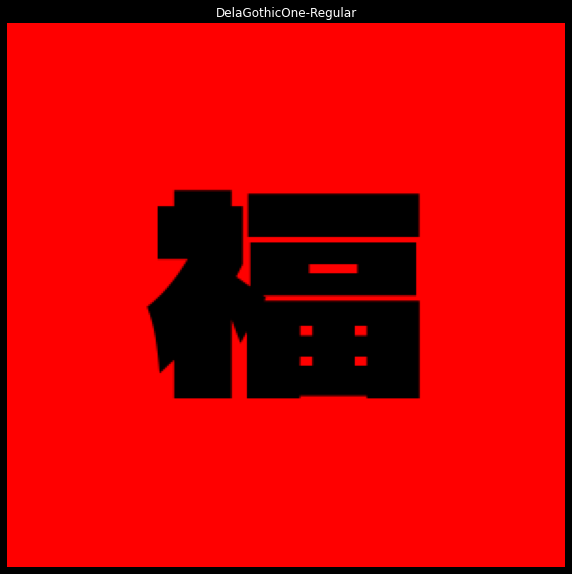

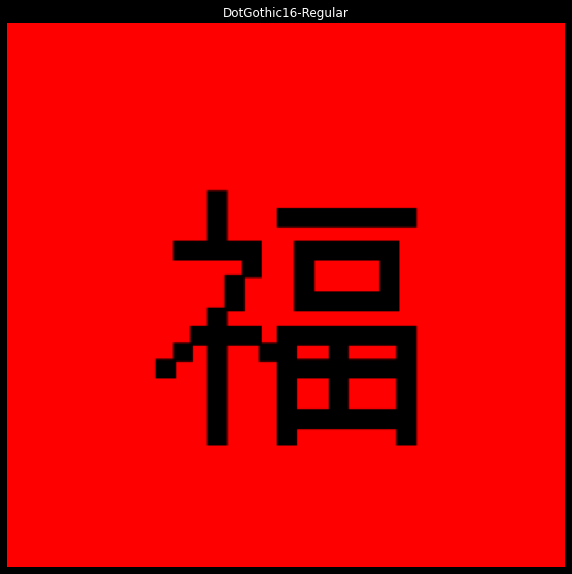

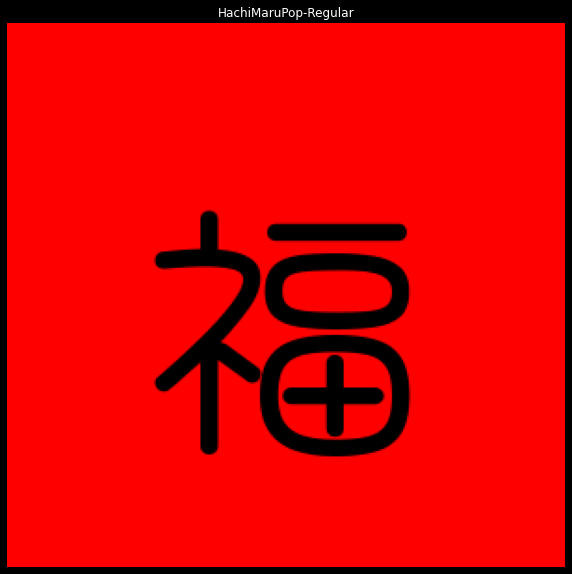

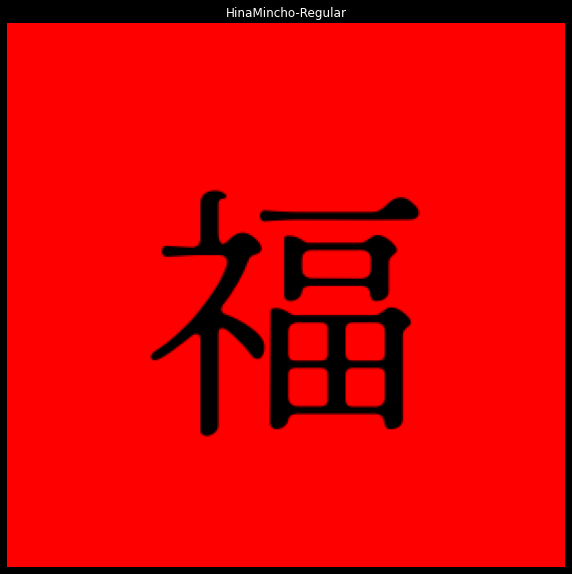

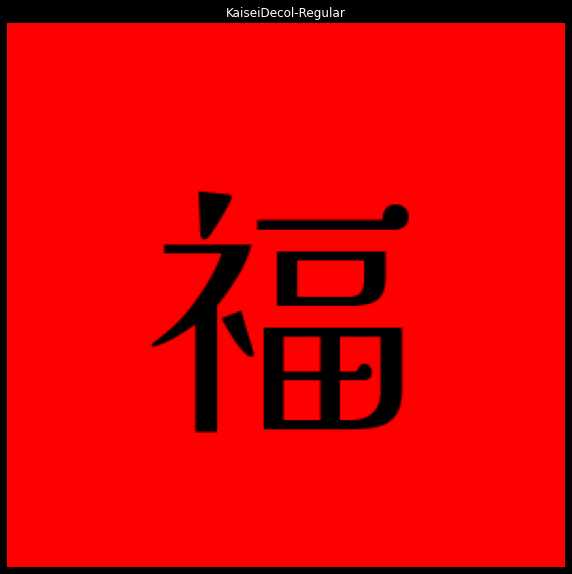

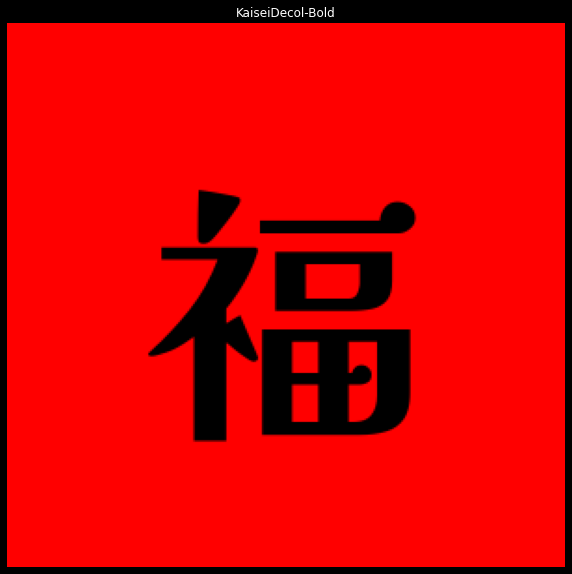

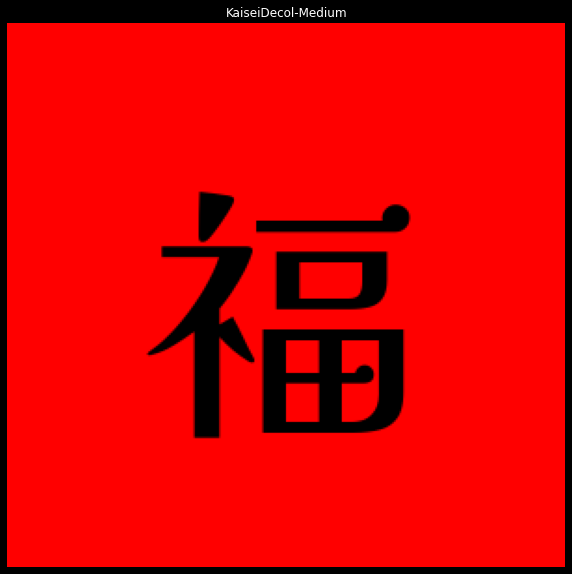

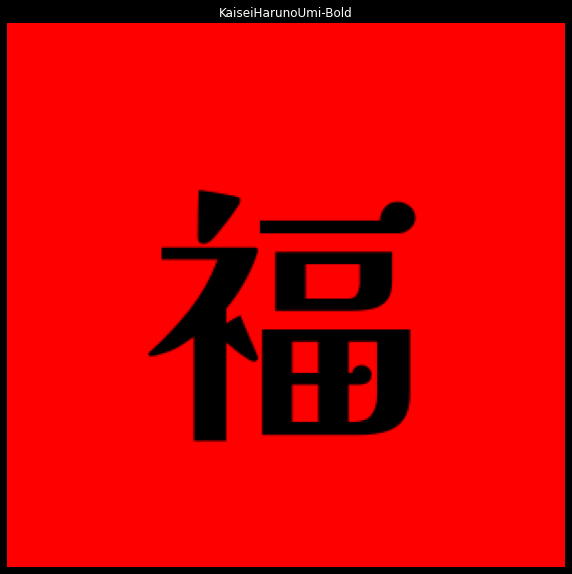

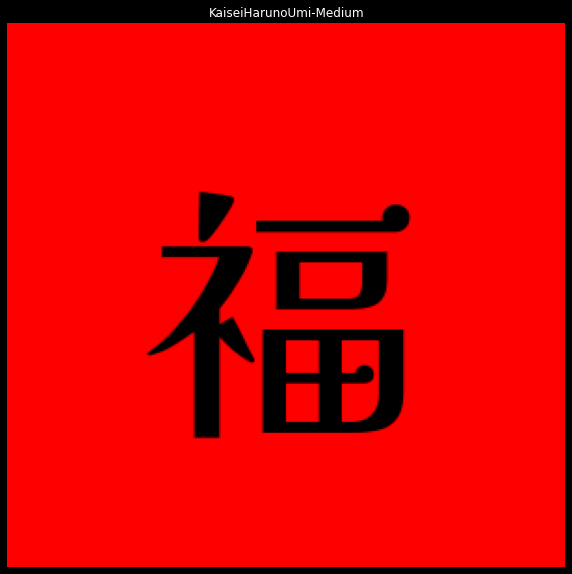

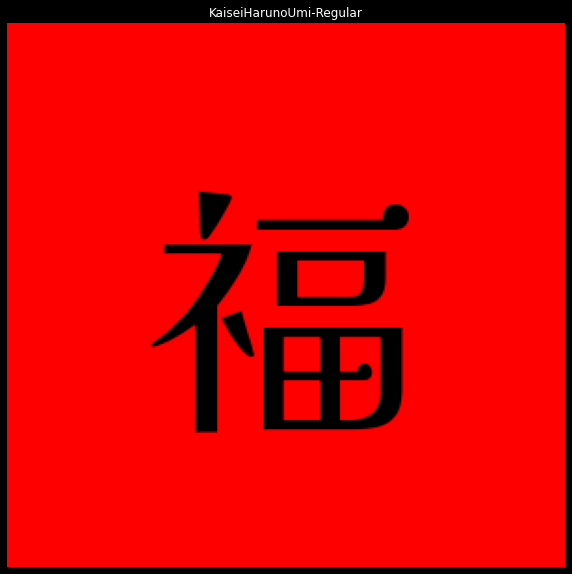

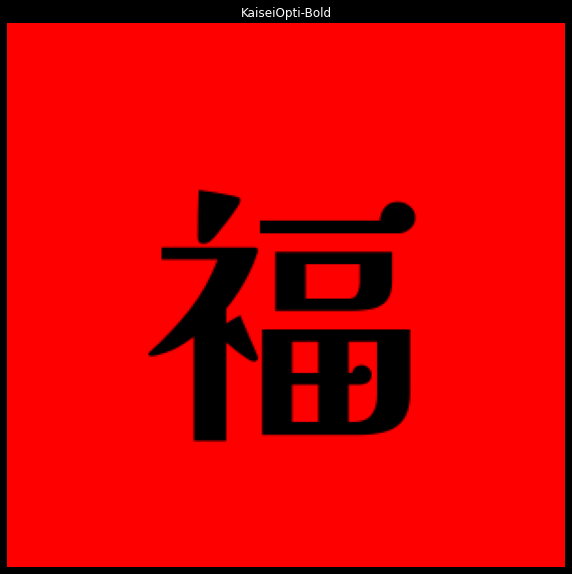

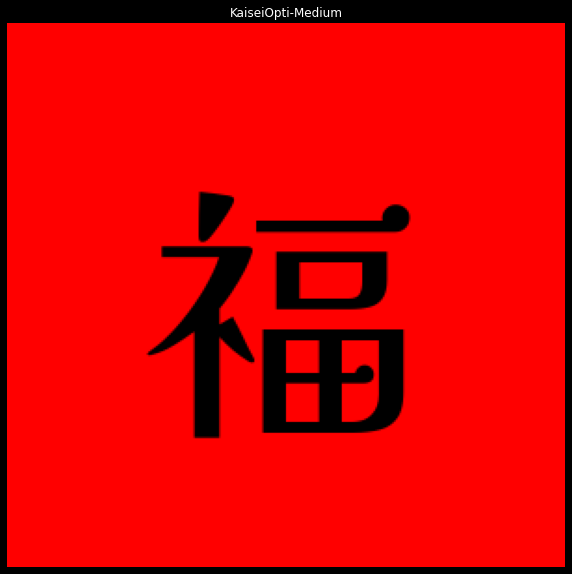

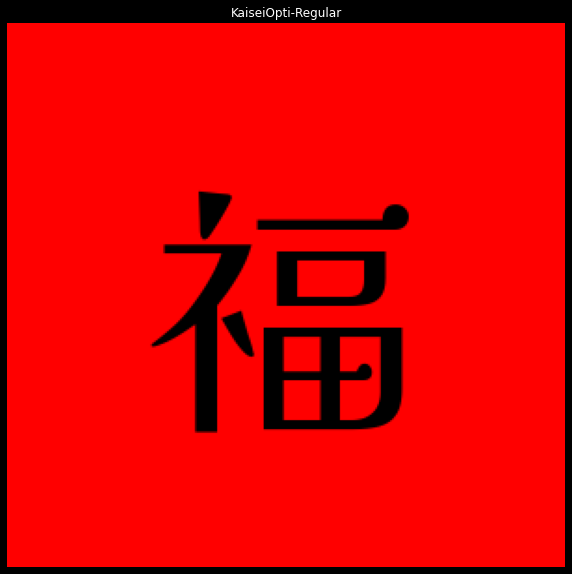

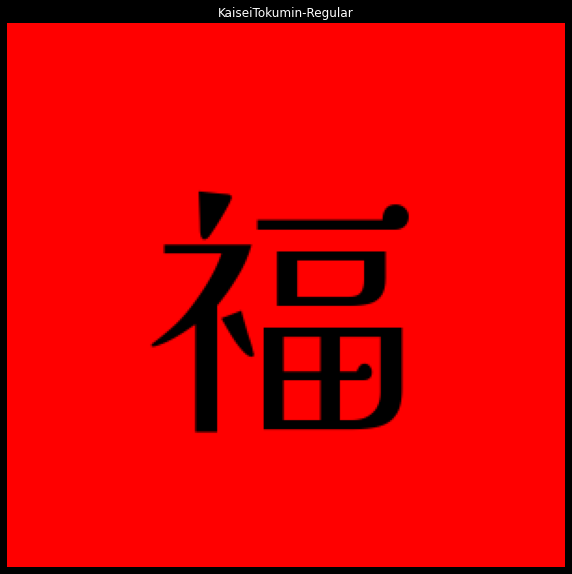

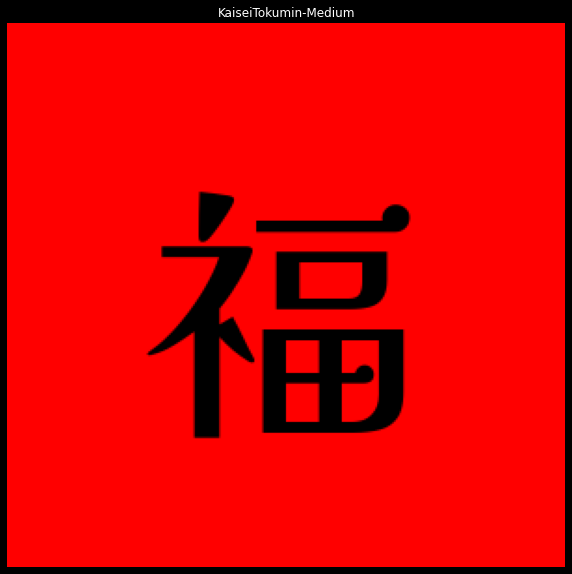

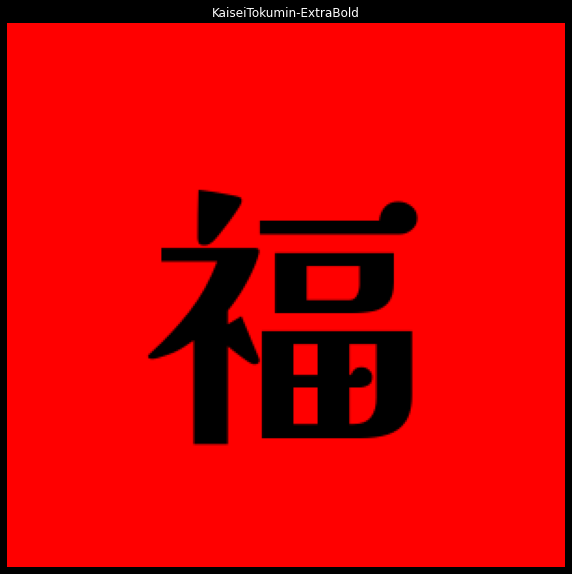

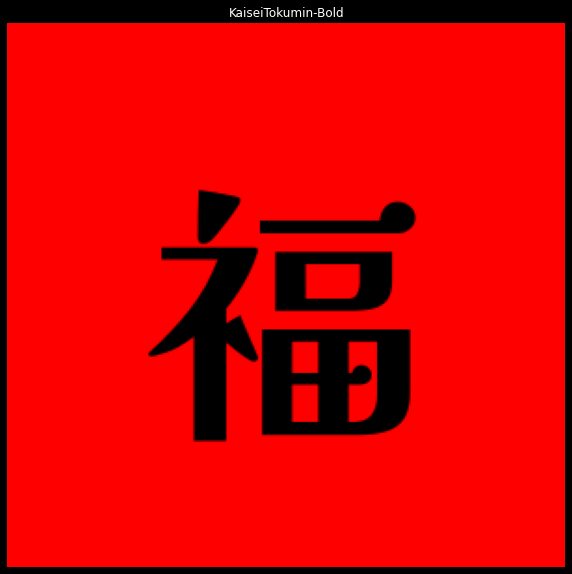

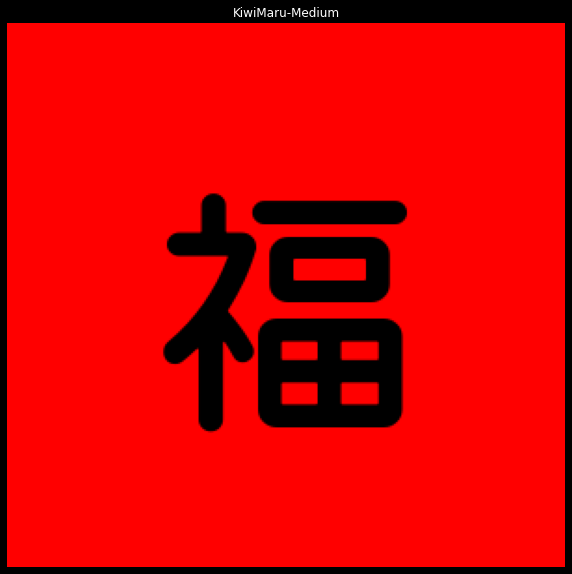

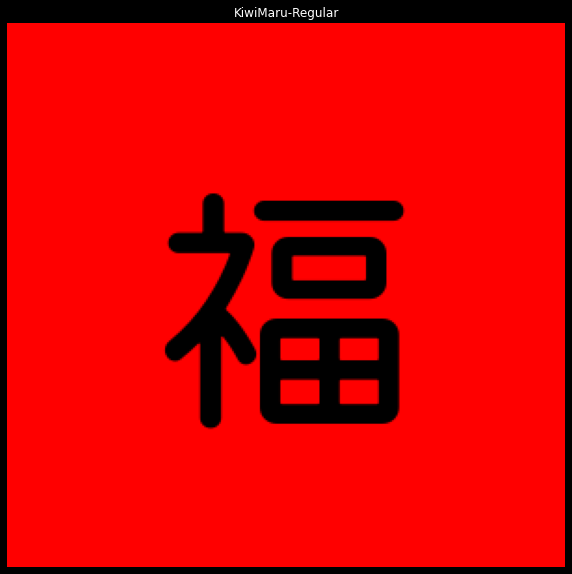

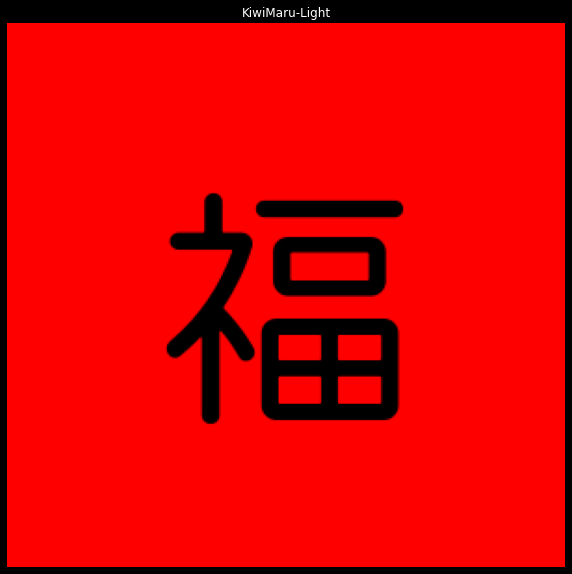

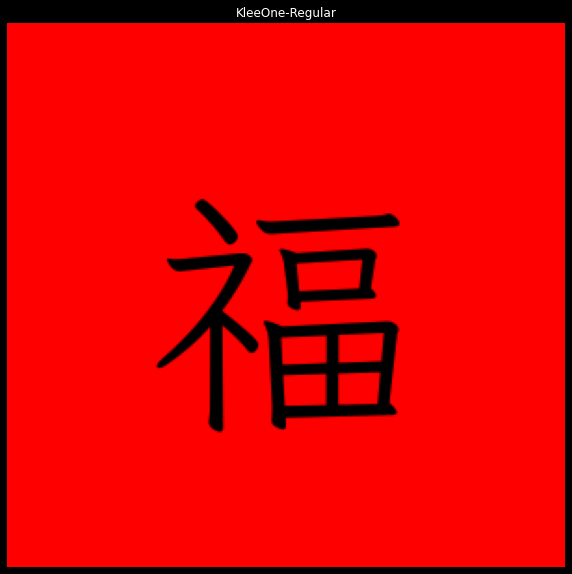

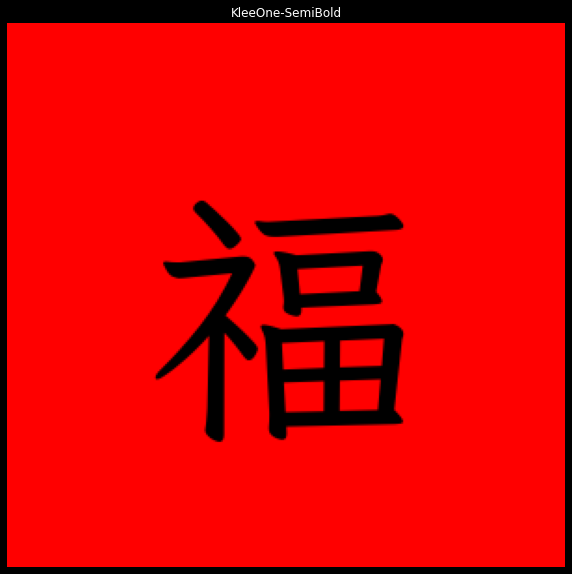

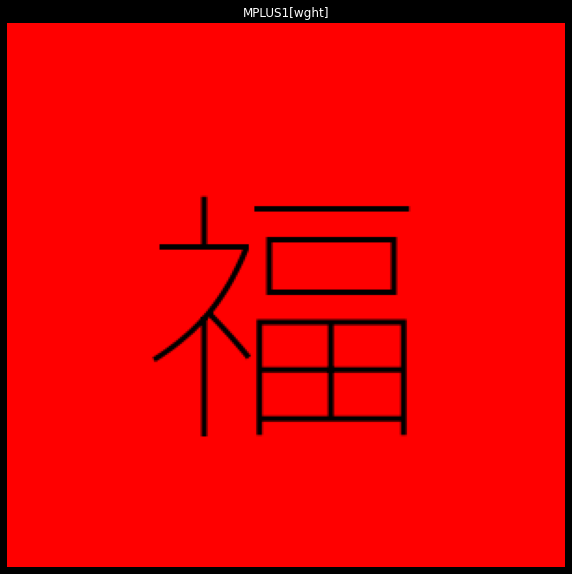

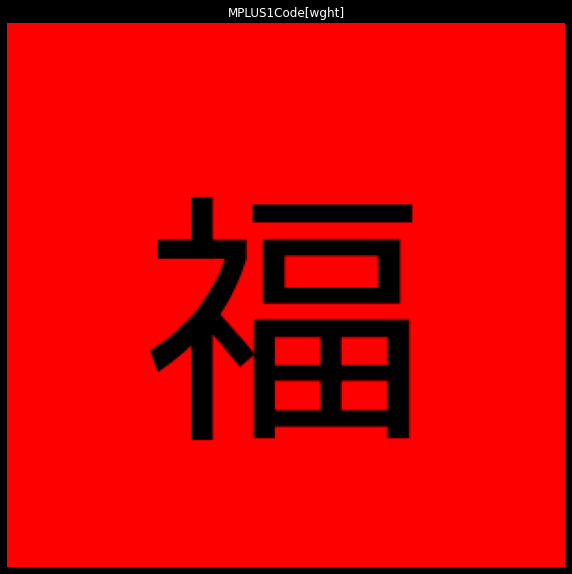

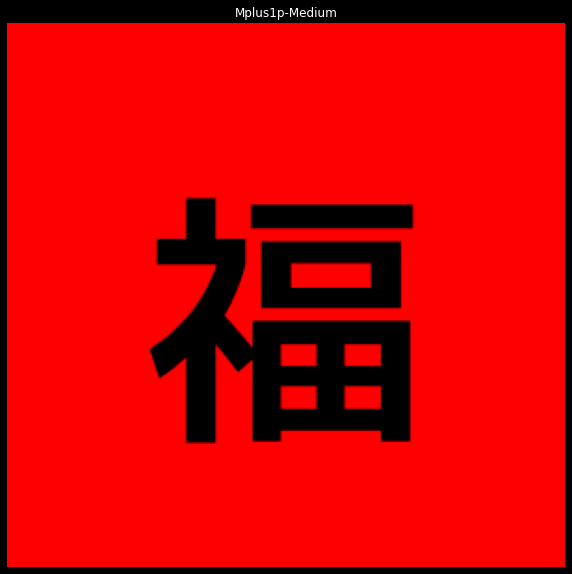

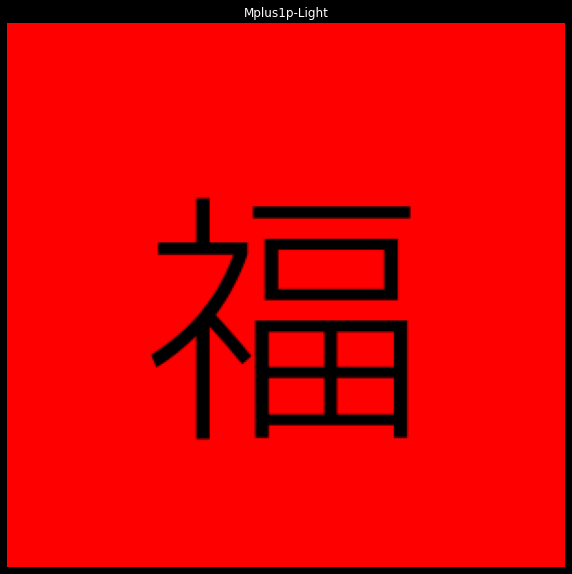

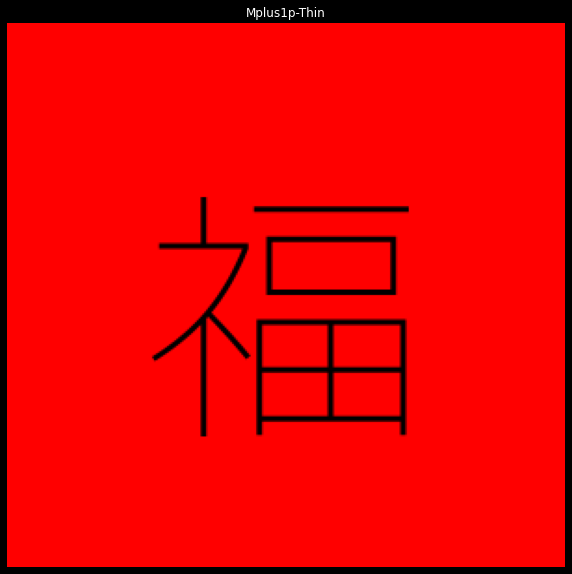

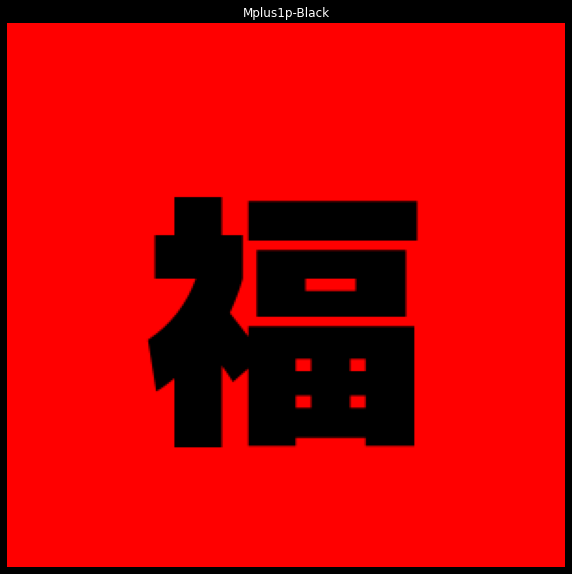

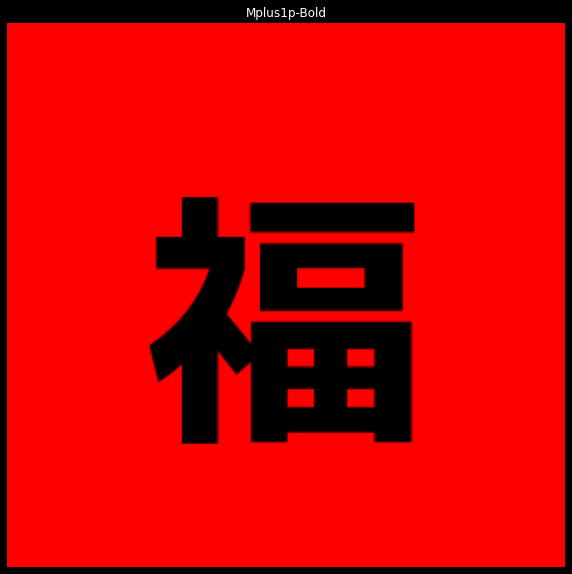

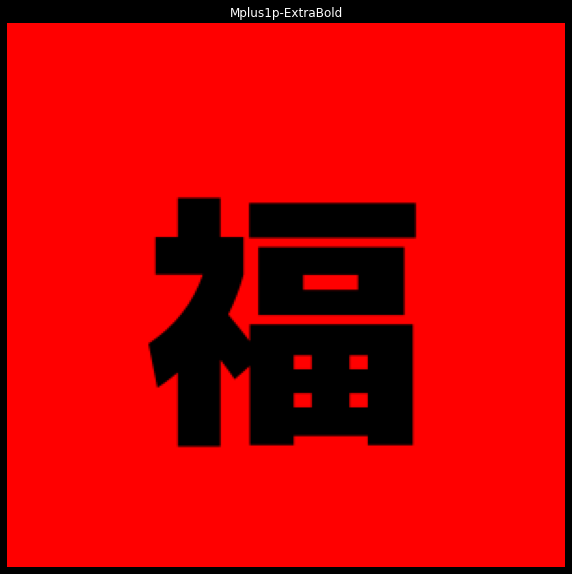

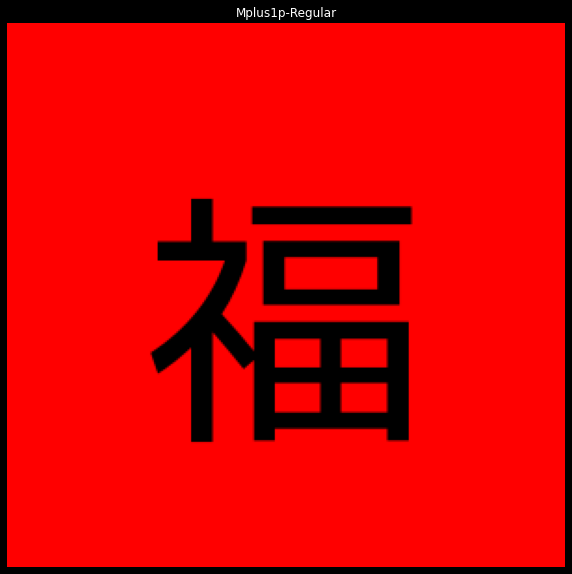

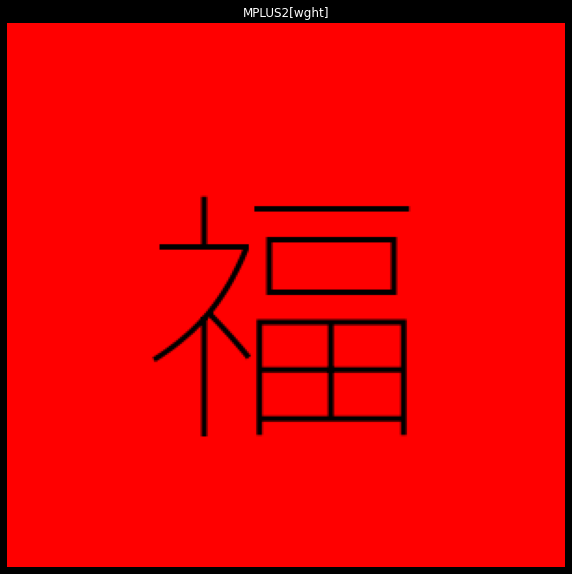

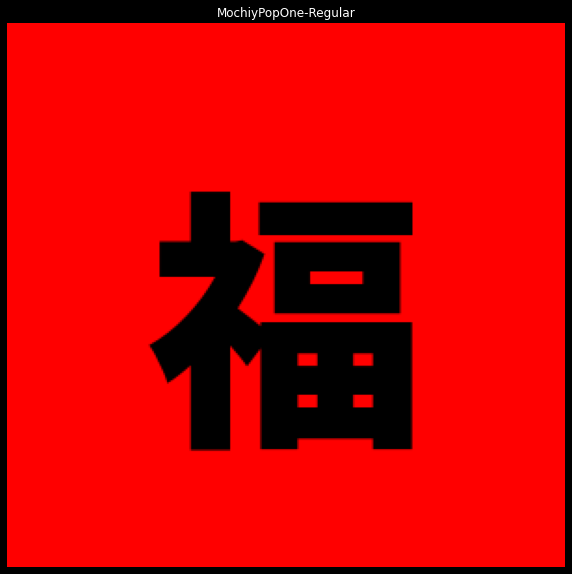

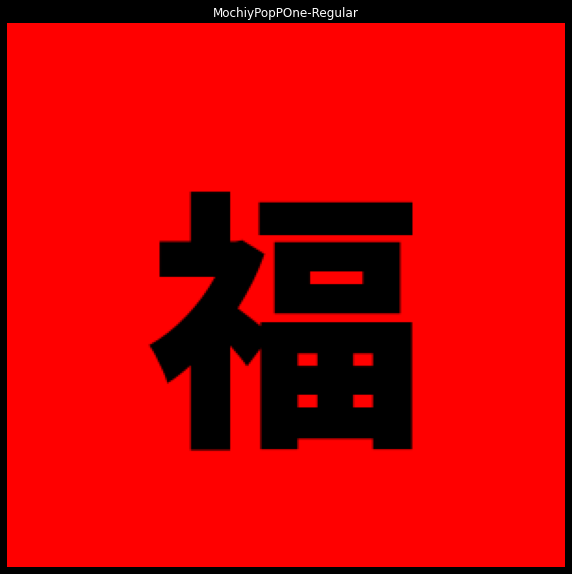

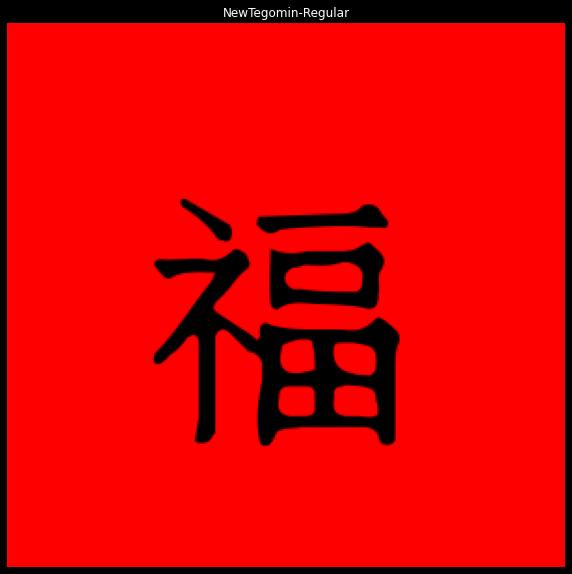

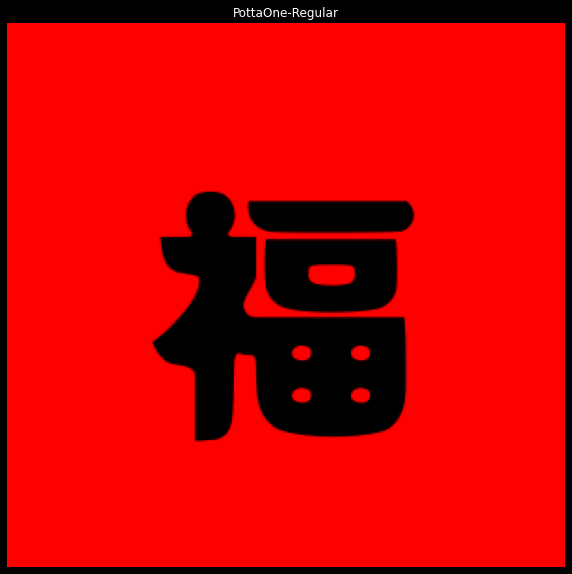

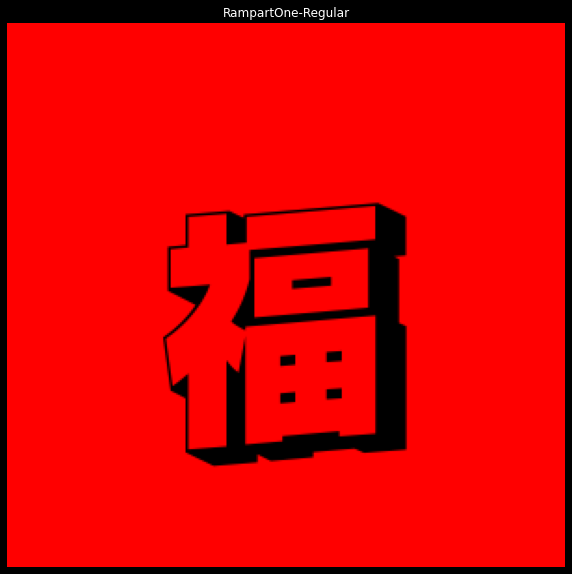

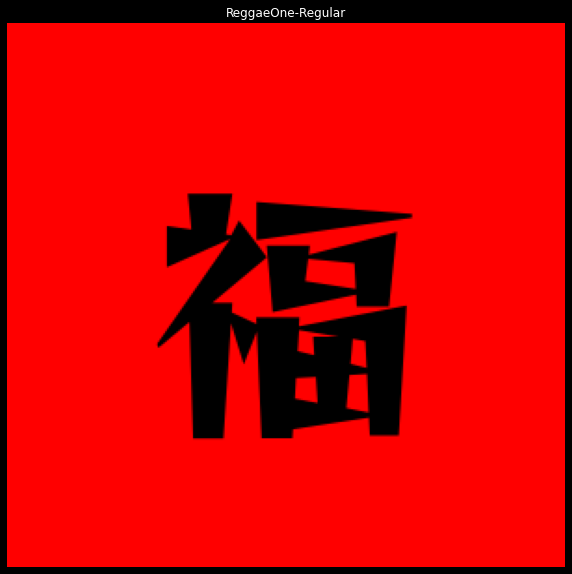

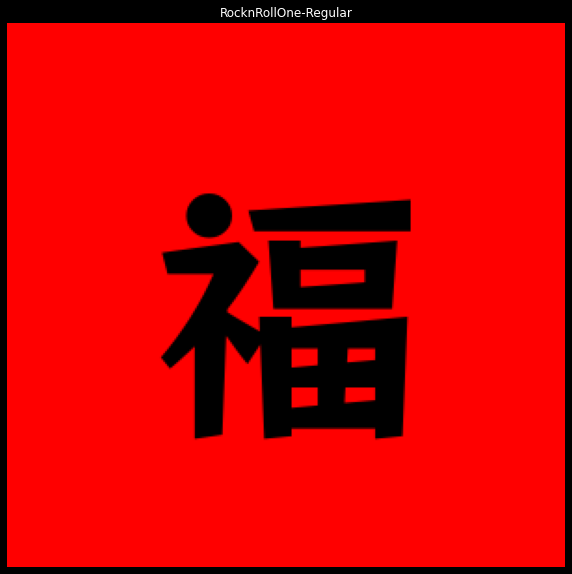

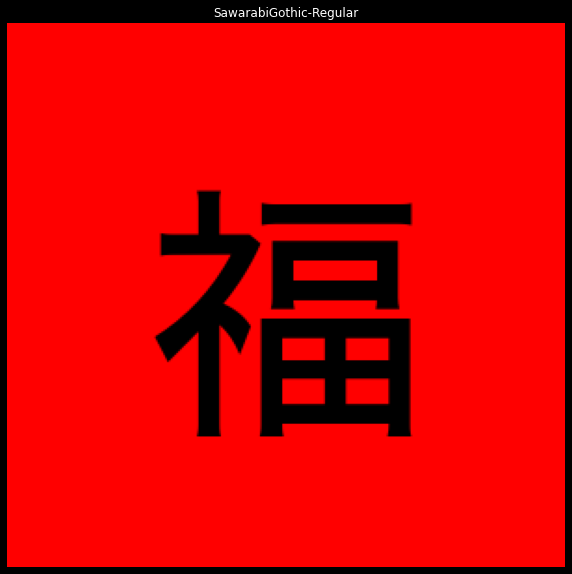

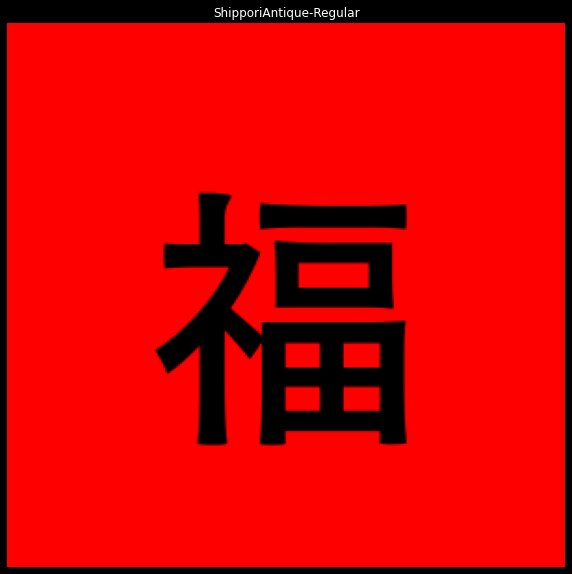

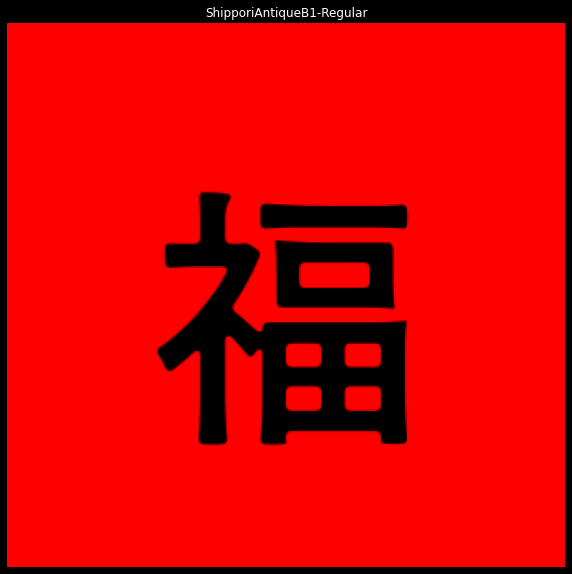

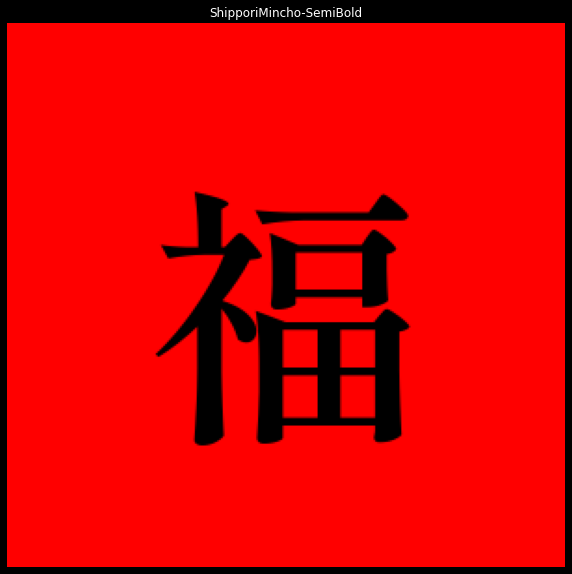

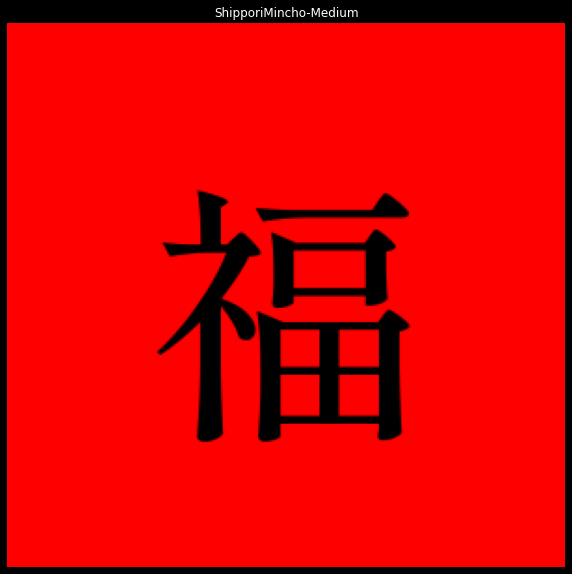

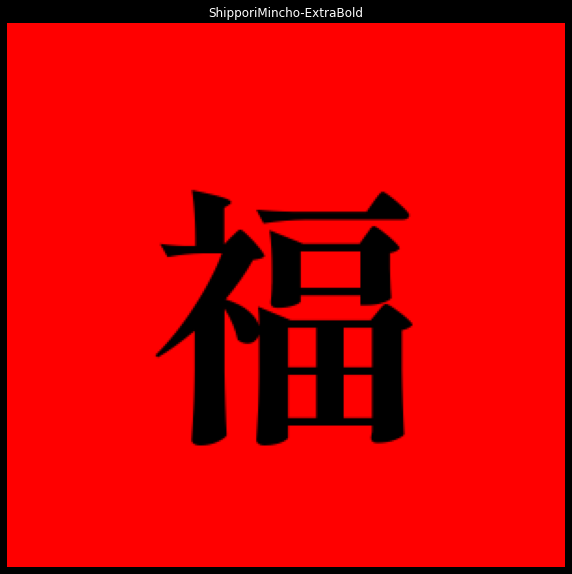

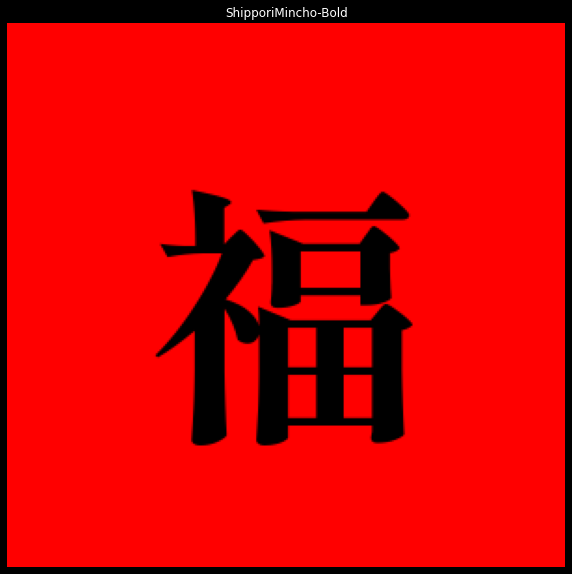

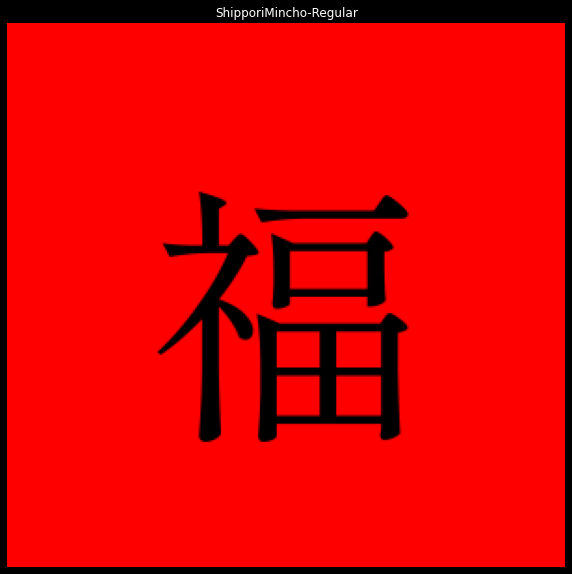

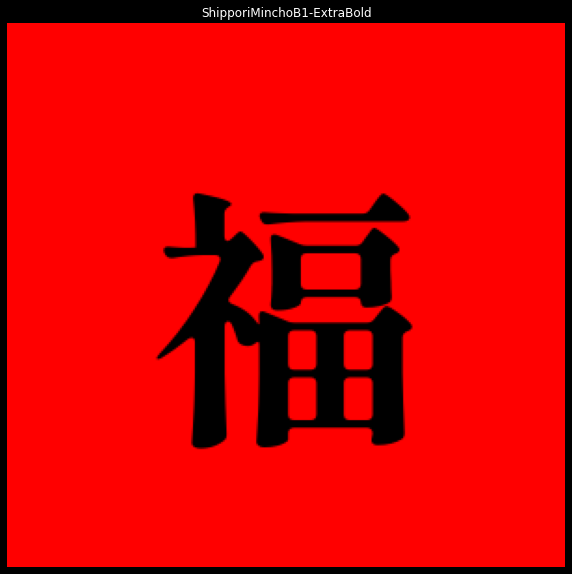

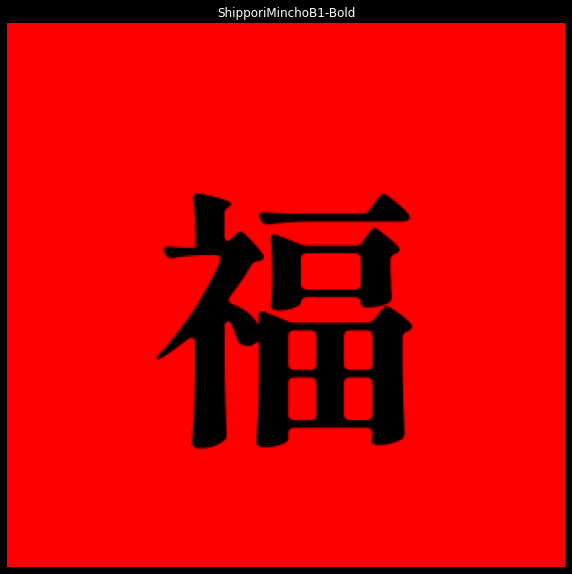

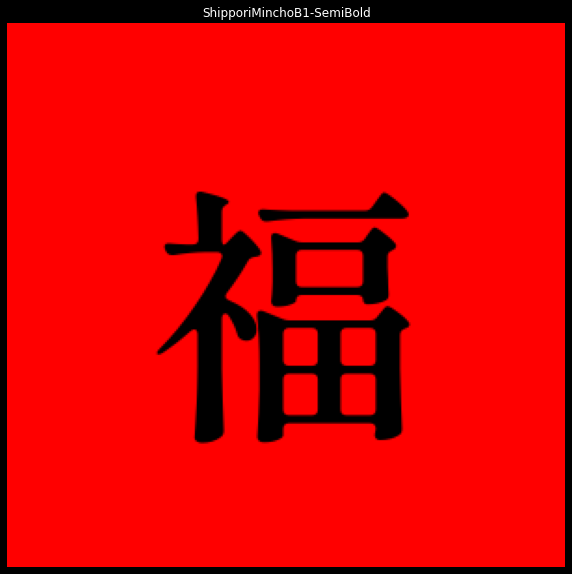

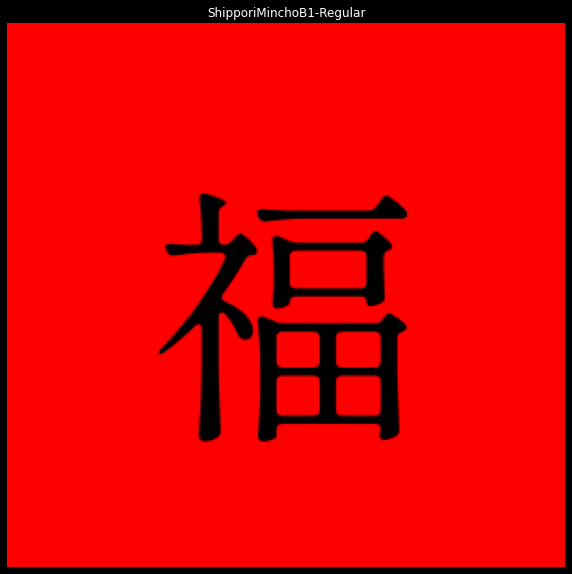

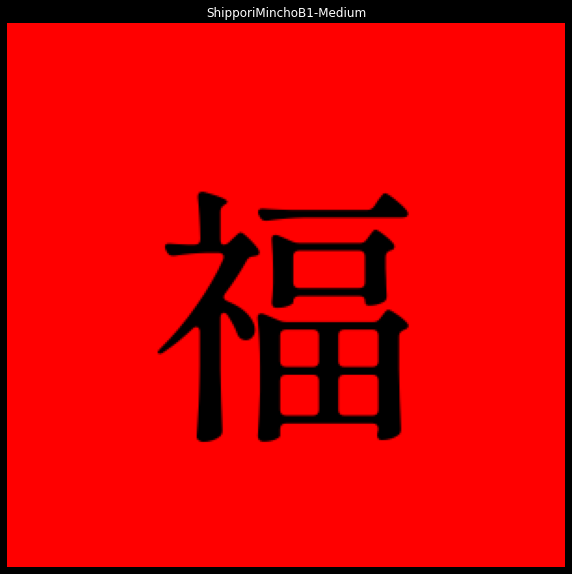

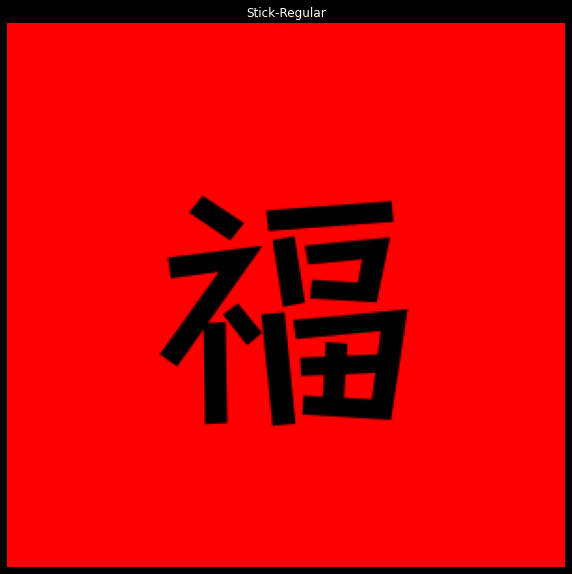

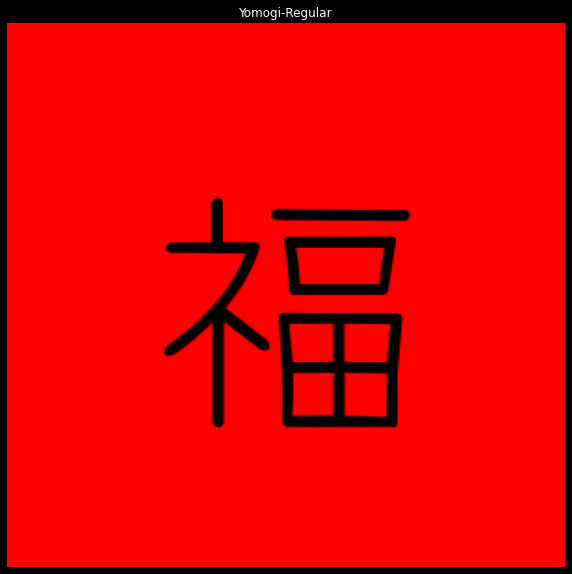

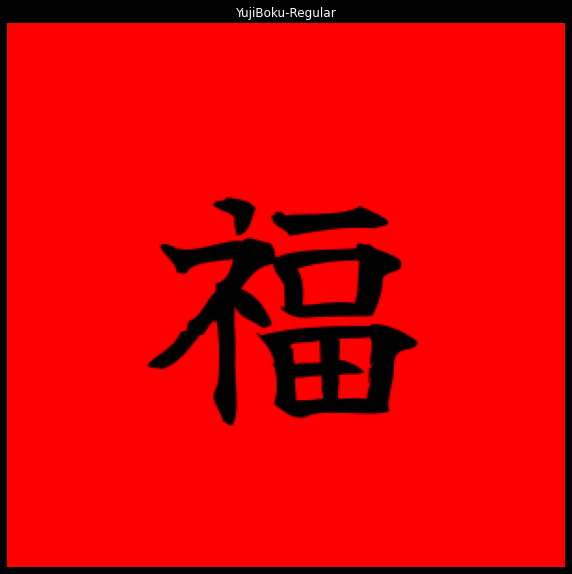

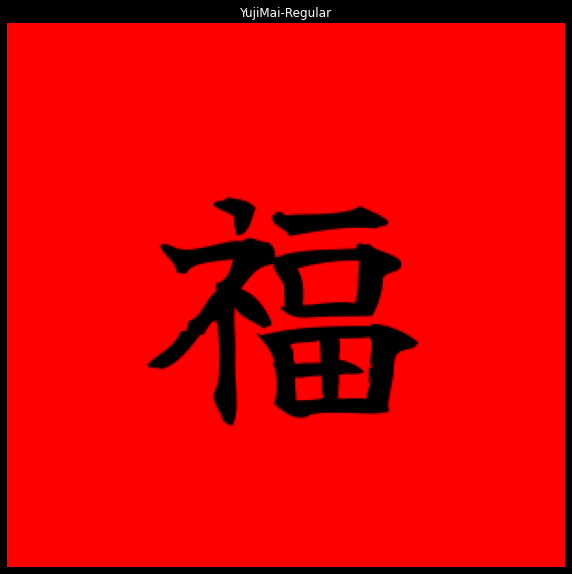

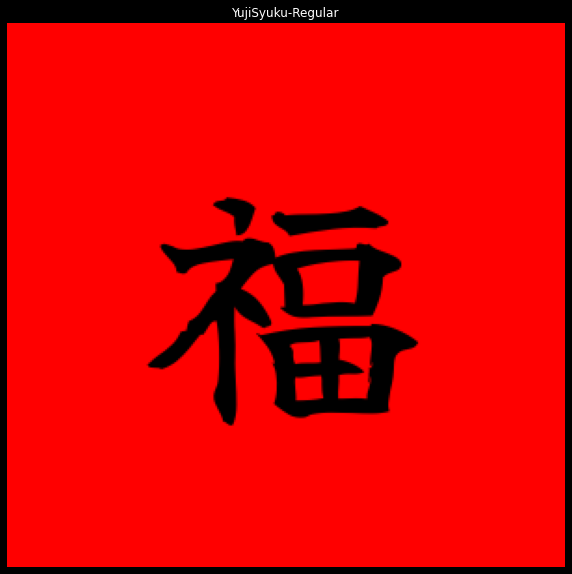

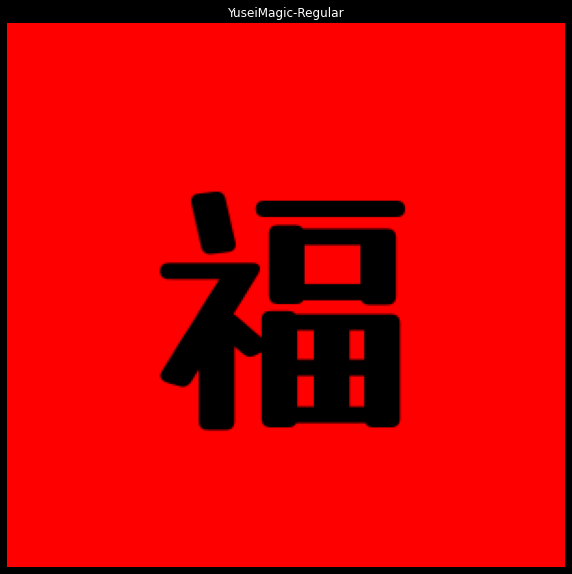

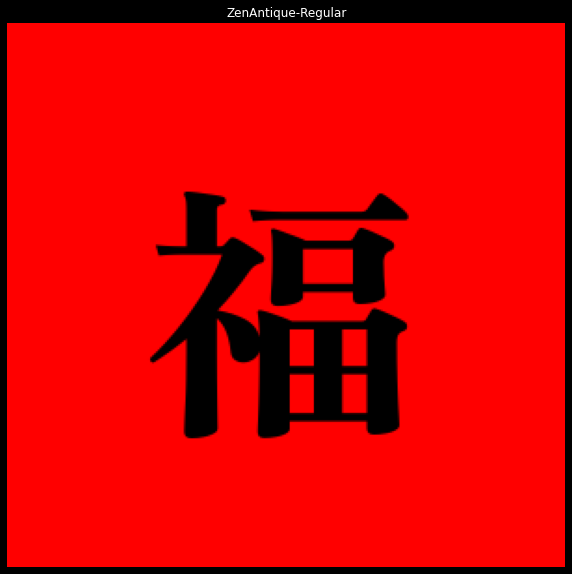

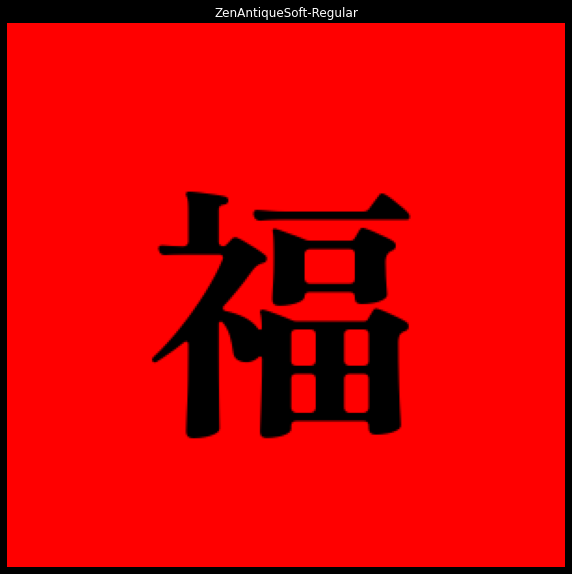

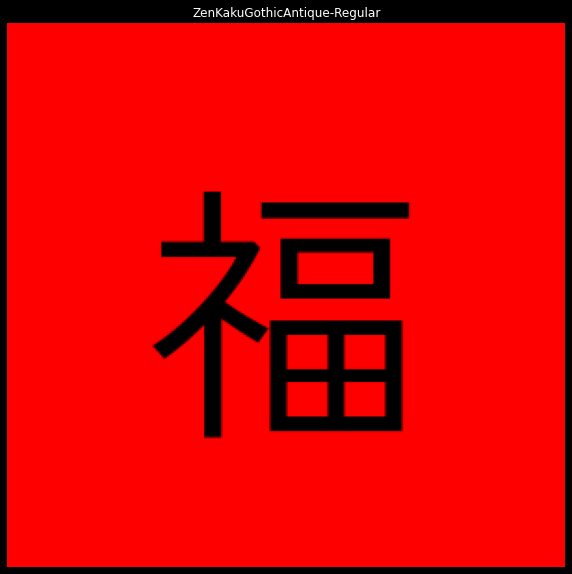

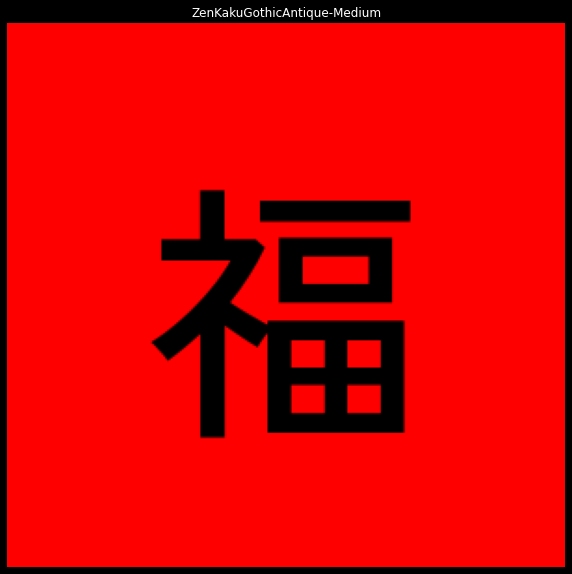

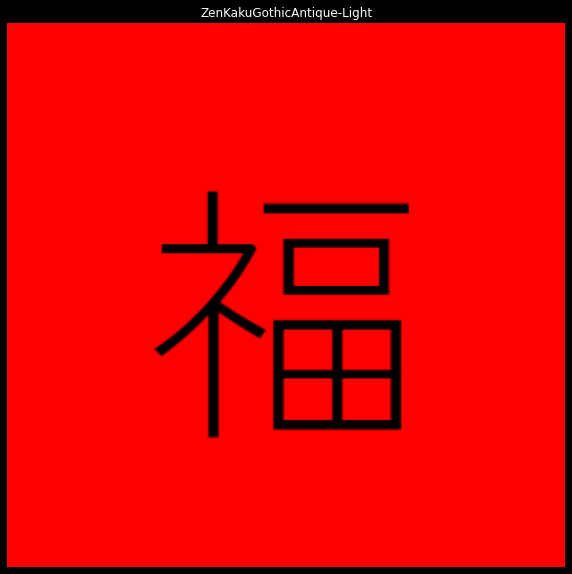

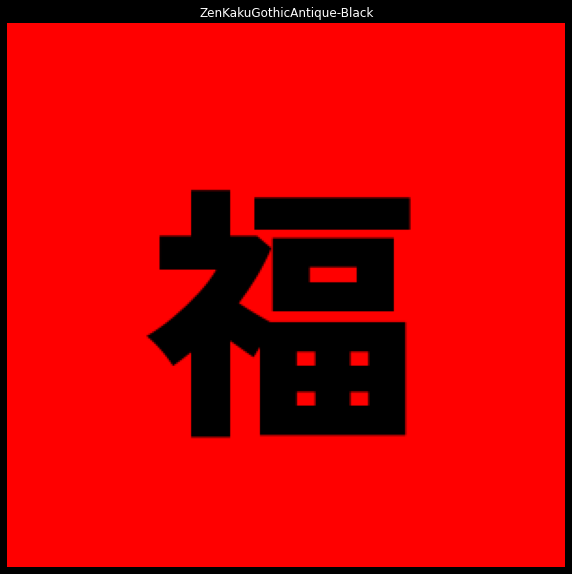

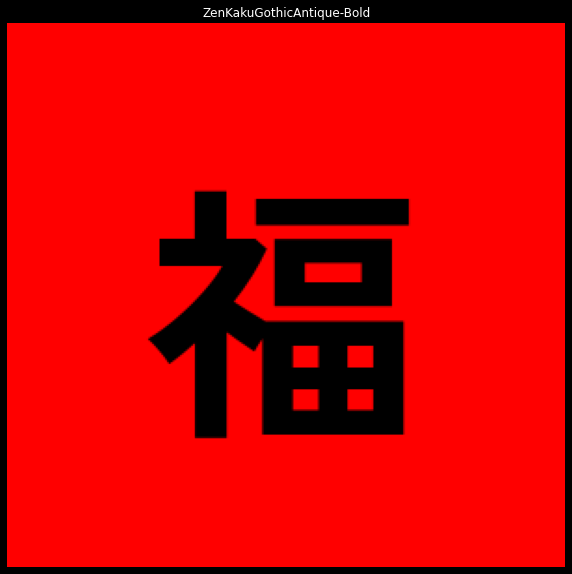

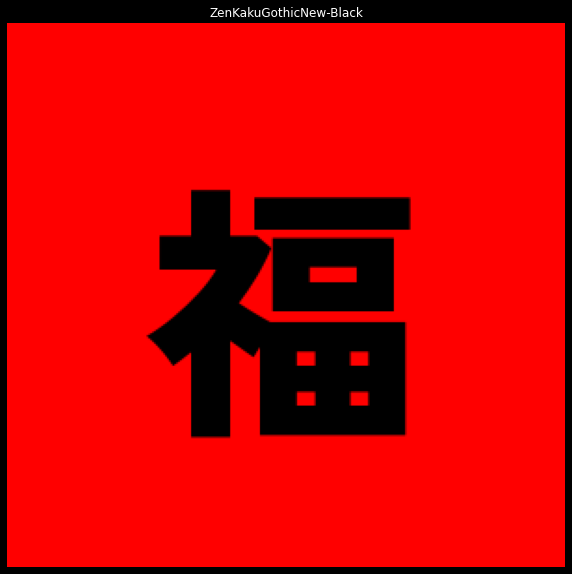

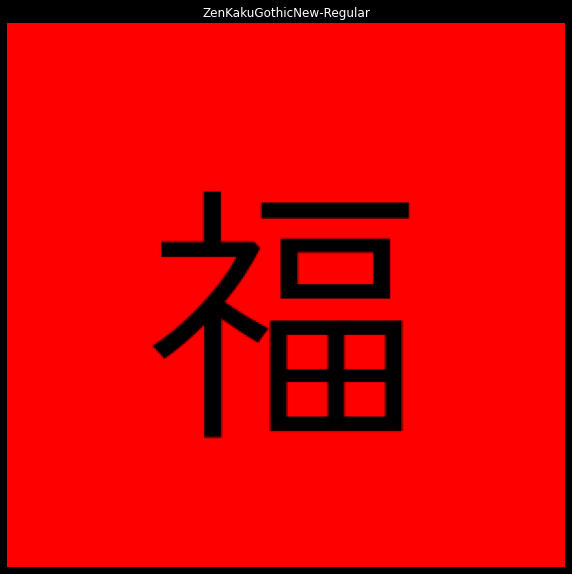

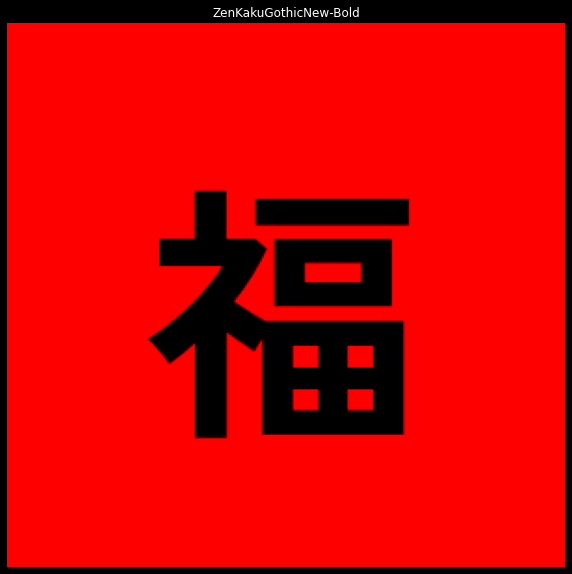

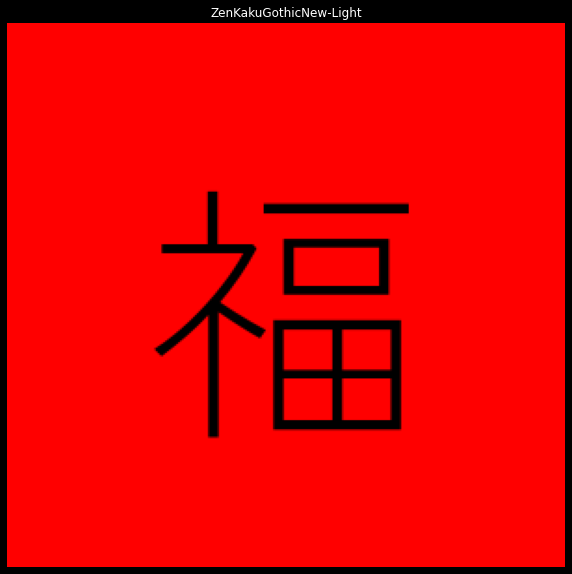

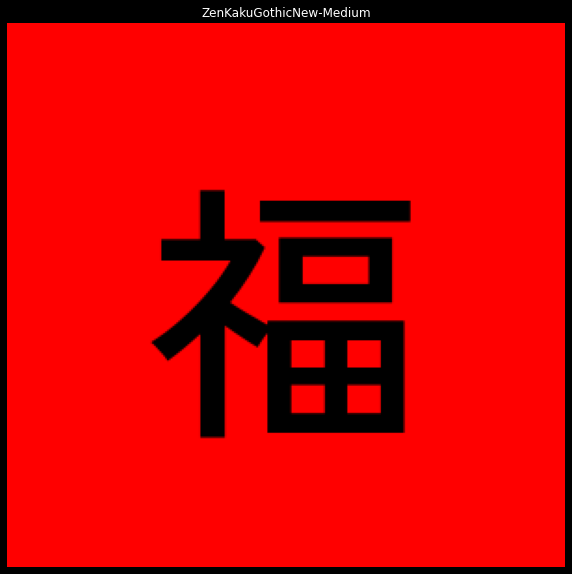

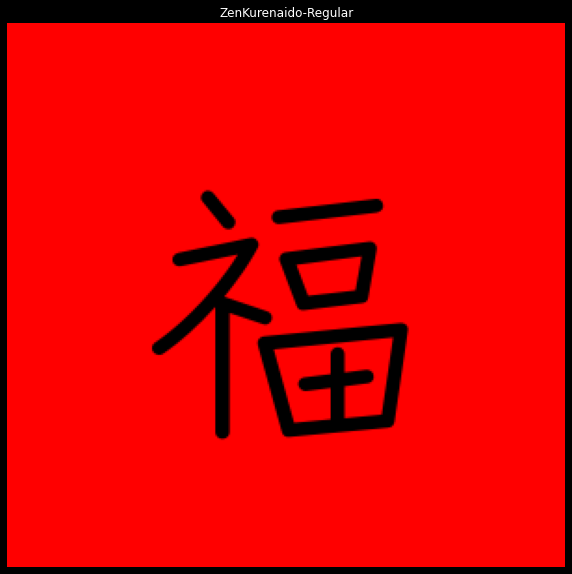

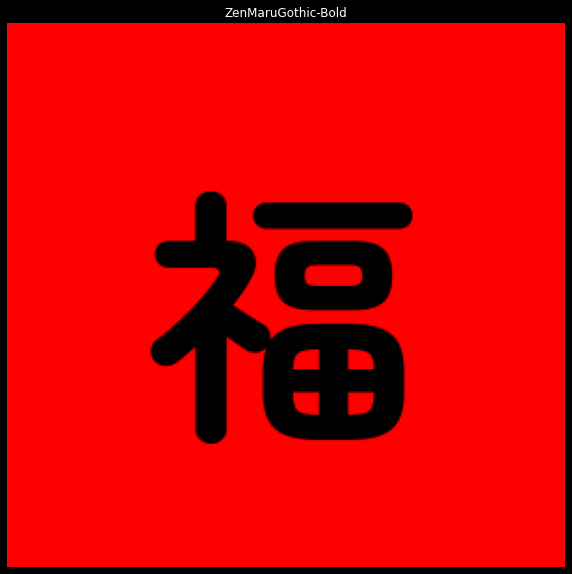

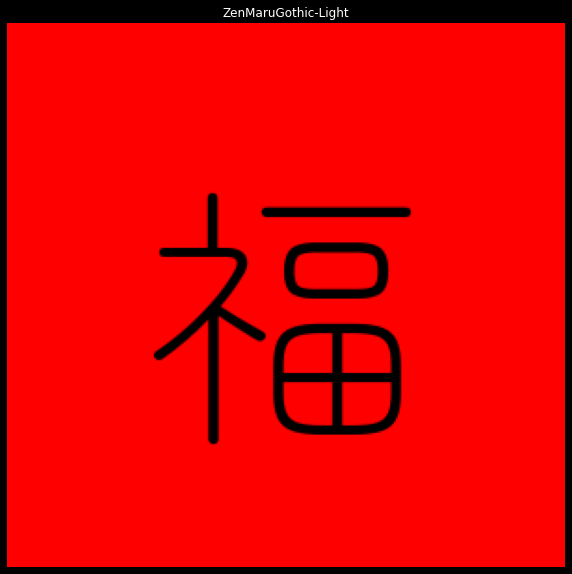

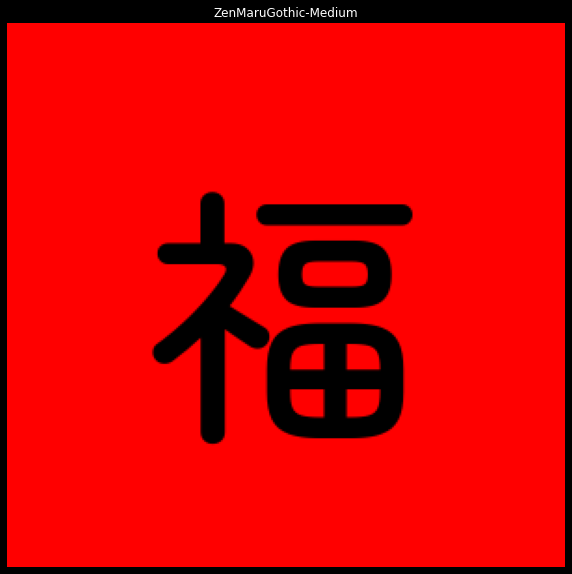

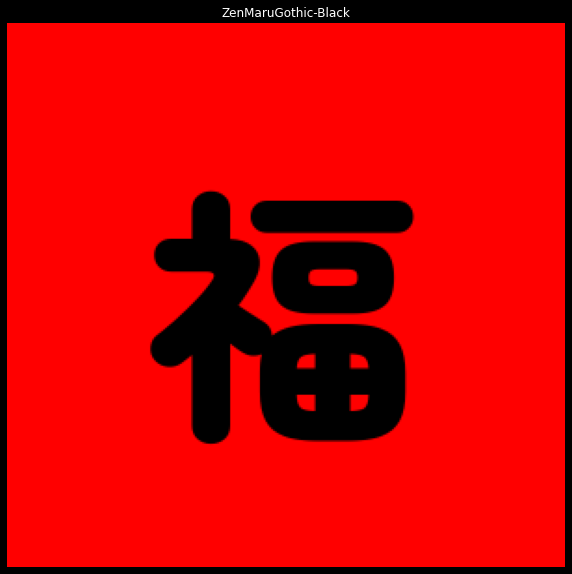

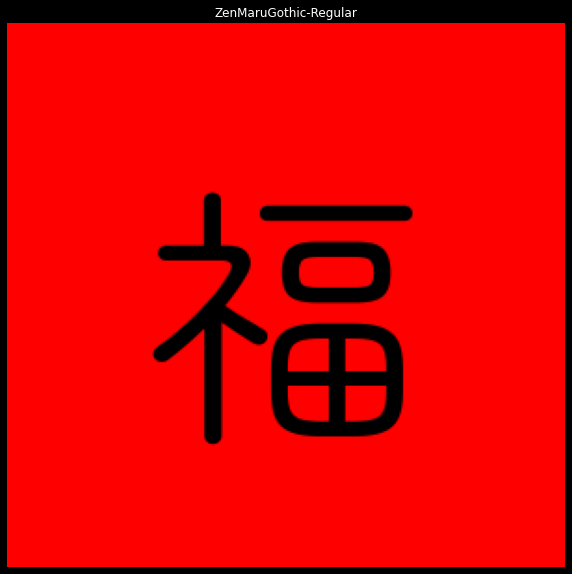

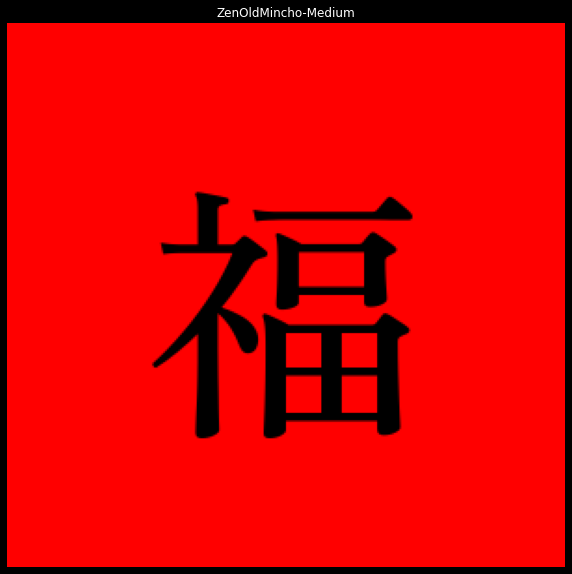

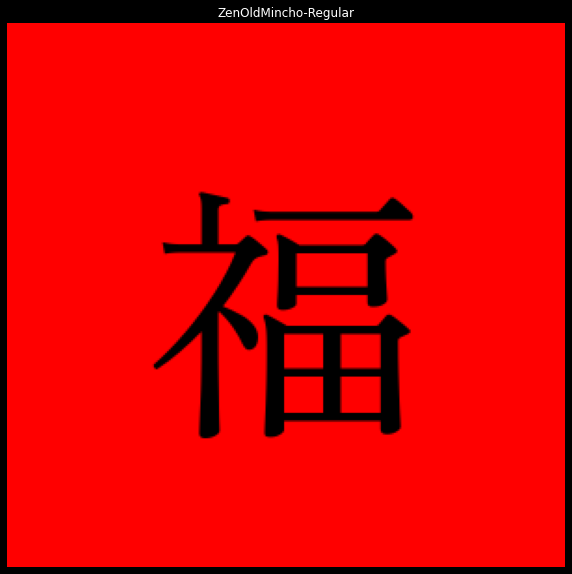

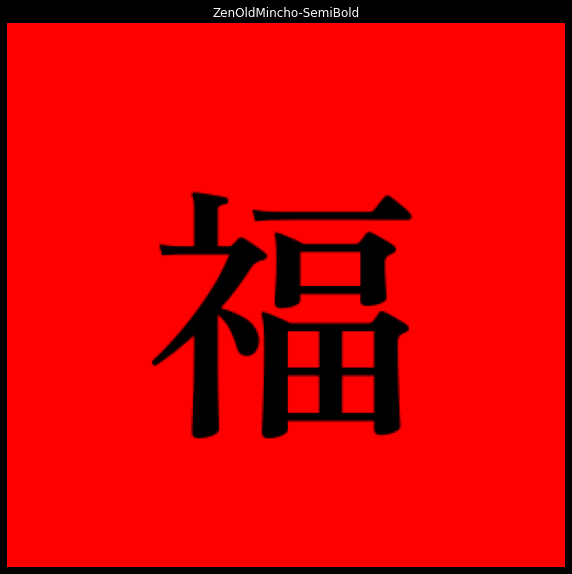

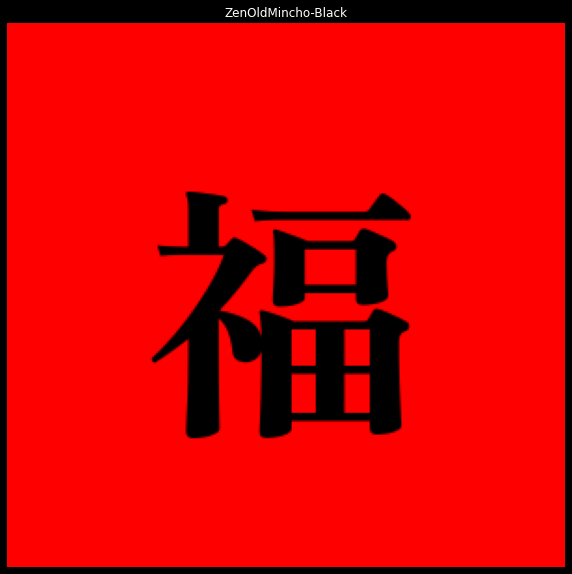

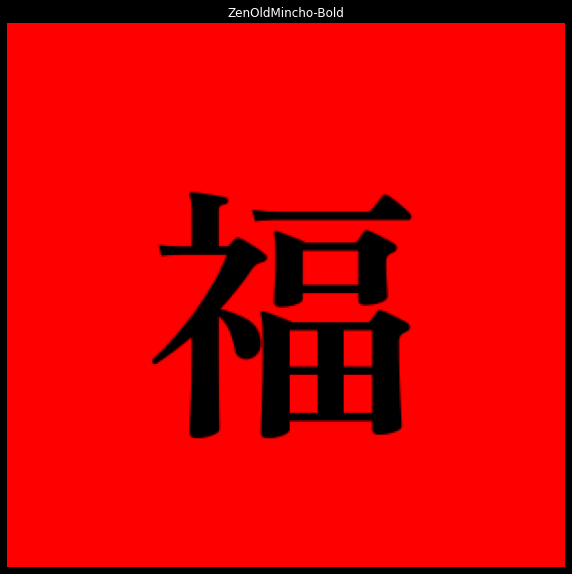

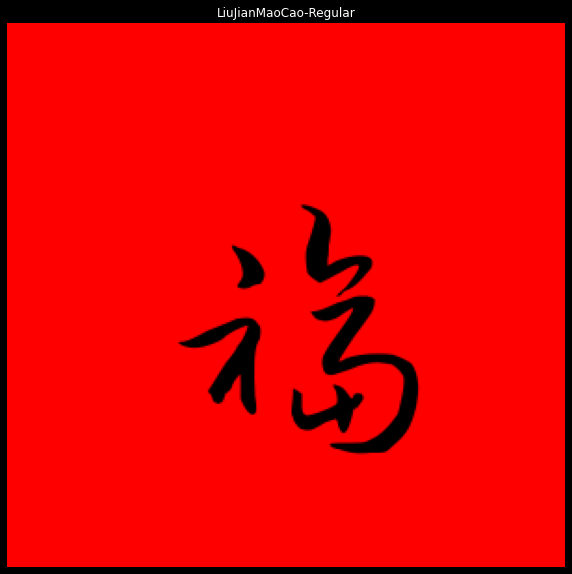

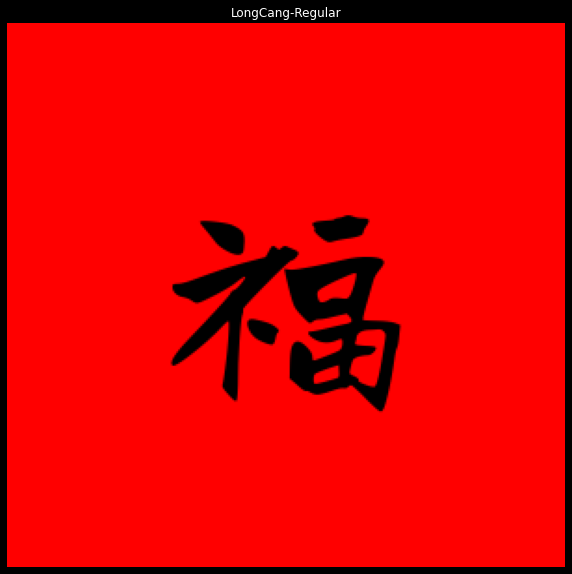

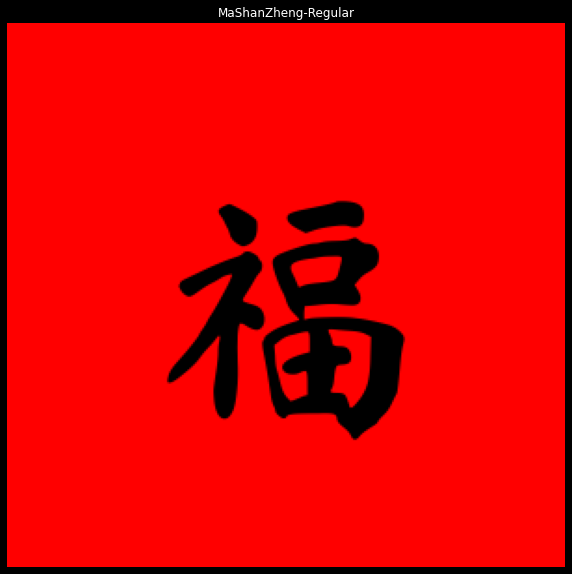

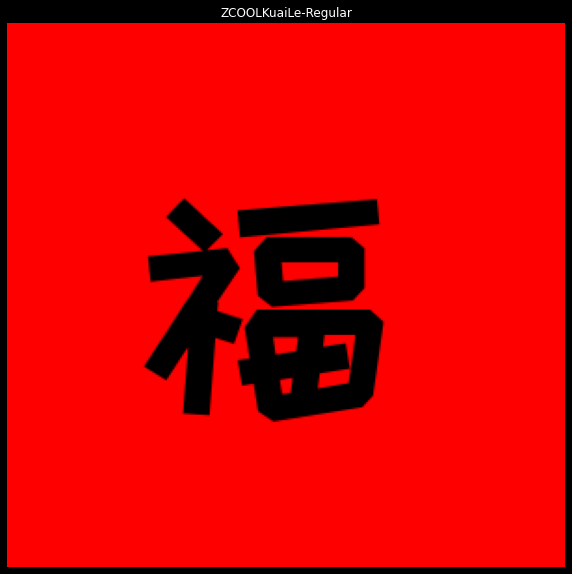

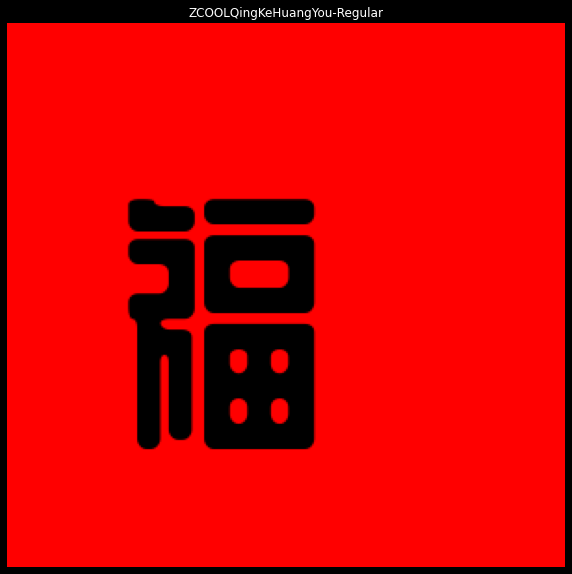

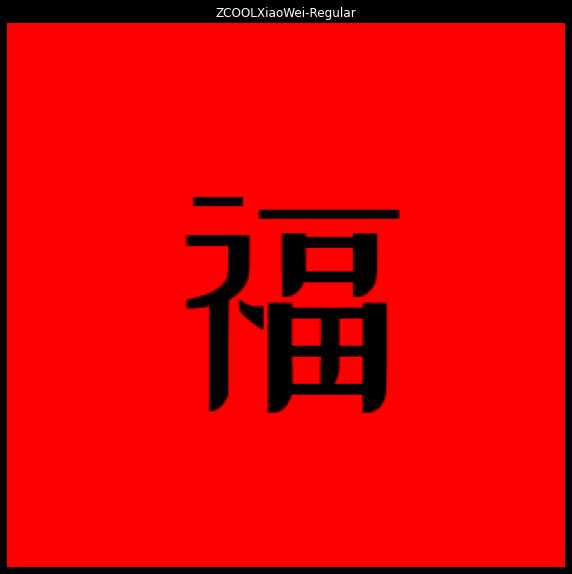

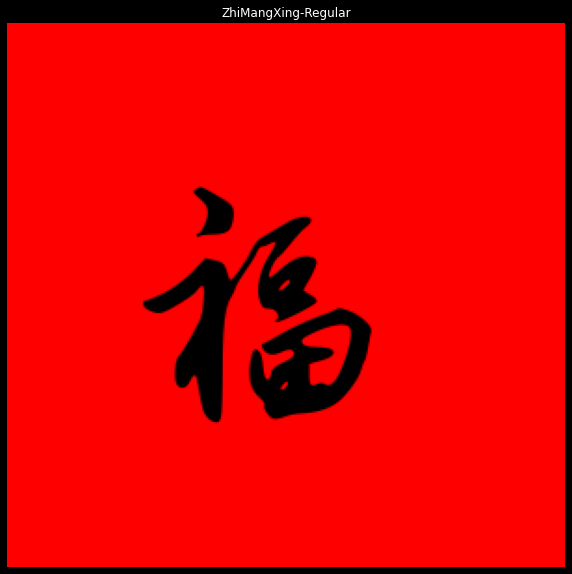

In [6]:
characters=["福"]
trad_characters = ["體","樂"]
characters=["福","新","年","快","身","健","康","心","想","事","成"]

IMG_WIDTH = 300
IMG_HEIGHT = 300
text_size = 150

maxplotstoshow=1e6
showonlyfirstcharacter=True

dontshowplots=False
jap_paths = filter_fonts_get_paths(df, root=ROOT, subsets=['japanese'], variants=['_'], category='')
chi_paths = filter_fonts_get_paths(df, root=ROOT, subsets=[
                                   'chinese-simplified'], variants=['_'], category='')
for text in characters:
    print()
    print('Starting',text)
    
    characterfolder=os.path.join('data',text)
    shutil.rmtree(characterfolder)
    try:
        os.mkdir(characterfolder)
    except:
        pass
    
    if text in trad_characters:
        paths = jap_paths
        print(
            f"Using only japanese fonts ({len(paths)} of them) as {text} has a simplified version.")
    else:
        paths = jap_paths + chi_paths

        print(
            f"Using both japanese and simplified chinese fonts ({len(paths)} of them)for {text}.")
    for r in range(len(paths)):
        # sample text and font

        fontname=os.path.basename(paths[r]).split('.ttf')[0] 
        if fontname in fontblacklist:
            print(fontname,'is in blacklist')
            continue
            
        font = ImageFont.truetype(paths[r], text_size)

        # # get text info (not being used but may be useful)
        text_width, text_height = font.getsize(text)
        left, top, right, bottom = font.getbbox(text)
        # print('text w & h: ', text_width, text_height)
        # print(left, top, right, bottom)

        x = (right-left) # we can adjust this according to IMG_WIDTH etc
        y = 150+(bottom-top)/2

        # create a blank canvas with extra space between lines
        canvas = Image.new('RGB', (IMG_WIDTH, IMG_HEIGHT), "red")

        # draw the text onto the text canvas
        draw = ImageDraw.Draw(canvas)
        draw.text((x, y), text, 'black', font, anchor='ms')

        fig = plt.figure(figsize=(10,10))
        plt.imshow(canvas, aspect='auto')
        plt.axis('off')
        plt.margins(0)
        
        filename = os.path.join(characterfolder,fontname+'.jpg')

        plt.savefig(filename,bbox_inches='tight',pad_inches=0)
        plt.title(fontname)
        # plt.imsave(filename, canvas, cmap='gray')
        # plt.imsave(filename, canvas)
        if r>maxplotstoshow or dontshowplots:
            plt.close()
    if showonlyfirstcharacter:
        dontshowplots=True